# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Материалы
Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
Matplotlib User Guide: http://matplotlib.org/users/index.html

# Задача 1. Минимизация гладкой функции

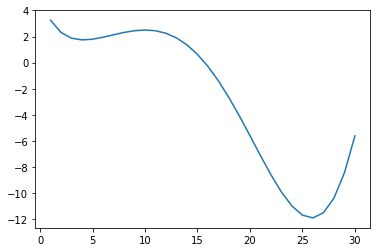

In [57]:

import numpy as np
from matplotlib import pylab as plt
import math
from scipy import optimize

def f(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.)
 
x = [i for i in range(1, 31)]
y = [f(i) for i in x]
plt.plot(x, y)
plt.show()

In [16]:
res1 = optimize.minimize(f, x0 = 2, method = 'BFGS')
res2 = optimize.minimize(f, x0 = 30, method = 'BFGS')

In [17]:
res1
    

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

In [18]:
res2

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

In [19]:
type(res1)

scipy.optimize.optimize.OptimizeResult

In [28]:
str(round(f(res1.x), 2))+' '+str(round(f(res2.x), 2))

'1.75 -11.9'

# Задача 2. Глобальная оптимизация

In [30]:
from scipy.optimize import differential_evolution
bounds = [(2,30)]
res3=differential_evolution(f, bounds)

In [31]:
res3

     fun: -11.898894665981313
     jac: array([3.55271368e-07])
 message: 'Optimization terminated successfully.'
    nfev: 83
     nit: 4
 success: True
       x: array([25.88019322])

In [35]:
round(res3.fun, 2)

-11.9

# Задача 3. Минимизация негладкой функции

In [36]:
%matplotlib inline
def h(x):
    return int(math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.))


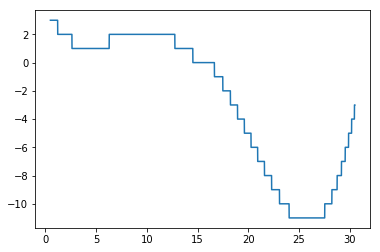

In [40]:
x = np.arange(0.5,30.5,0.001)
y = [h(i) for i in x]
plt.plot(x, y)
plt.show()

In [50]:
res4 = optimize.minimize(h, x0 = 30, method = 'BFGS')

In [55]:
h(res4.x)

-5

In [53]:
bounds = [(1,30)]
res5 = optimize.differential_evolution(h, bounds)
h(res5.x)

-11

In [54]:
res5

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([25.06521119])